# Titanic Classification Case Study.

In [38]:
## Font Style
BOLD   = "\033[1m"
RESET  = "\033[0m"

RED    = "\033[31m"
GREEN = "\033[32m"
CYAN    = "\033[36m"

# Libraries:-

In [39]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

### &emsp;&emsp; The goal is to create a predictive model which can predict the survival of a given person, if the person board the titanic and the ship sinks... again!

# Data Description:-



* <b>PassengerId</b>: The id for each passenger
* <b>Survived</b>: Whether the passenger survived or not? 1=Survived, 0=Died
* <b>Pclass</b>: The travel class of the passenger
* <b>Name</b>: Name of the passenger
* <b>Sex</b>: The gender of the passenger
* <b>Age</b>: The Age of the passenger
* <b>SibSp</b>: Number of Siblings/Spouses Aboard
* <b>Parch</b>: Number of Parents/Children Aboard
* <b>Ticket</b>: The ticket number of the passenger
* <b>Fare</b>: The amount of fare paid by the passenger
* <b>Cabin</b>: The cabin number allotted
* <b>Embarked</b>: Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

*******************************************
*******************************************

In [40]:
# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

# Reading the dataset & Removing duplicate rows if any:-

In [41]:
TitanicSurvivalData = pd.read_csv('C:\\Users\\Pranab_Kumar_Paul\\Desktop\\Python_Script\\M_L_Script\\Data\\Classification Datasets\\TitanicSurvivalData.csv', encoding='latin')
print(BOLD, 'Shape before deleting duplicate values:', TitanicSurvivalData.shape, RESET)

# Removing duplicate rows if any
TitanicSurvivalData=TitanicSurvivalData.drop_duplicates()
print(BOLD, 'Shape After deleting duplicate values:', TitanicSurvivalData.shape, RESET)

# Data Backup
DATA_BACKUP= TitanicSurvivalData

print(BOLD, 'So this file contains {} passenger details.'.format(len(TitanicSurvivalData.index)), RESET)

# Printing sample data
TitanicSurvivalData.head(10)

 Shape before deleting duplicate values: (891, 12) 
 Shape After deleting duplicate values: (891, 12) 
 So this file contains 891 passenger details. 


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# Problem Statement:-
### &emsp; &emsp; Create a predictive model which can tell if a person will survive or not?


&emsp; &emsp; &emsp;&emsp; 1. <b>Target Variable</b>: Survived.<br>
&emsp; &emsp; &emsp;&emsp; 2. <b>Predictors</b>: age, sex, passenger class etc.


&emsp; &emsp; &emsp;&emsp;&emsp; <b>Survived= 0</b> The passenger died.<br>
&emsp; &emsp; &emsp;&emsp;&emsp; <b>Survived= 1</b> The passenger survived.

<br>

# Determining the type of Machine Learning:-
&emsp; As per the problem statement I need to create a <b>Supervised ML Classification Model</b>, as the target variable is categorical.

# Looking at the distribution of Target variable:-

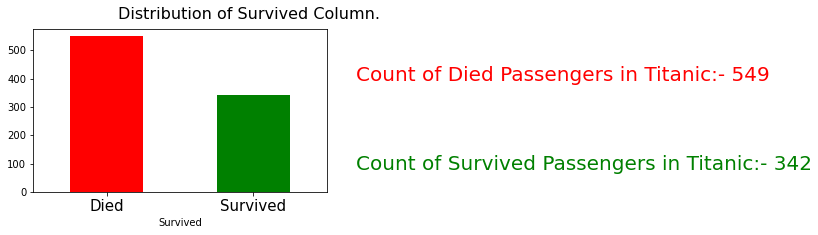

In [42]:
# Inputs.
inpdata        =  TitanicSurvivalData
column_name    =  'Survived'
category       =  ['Died','Survived']
category_color =  ['red','green']

# Grouped Bar plot & Category Values
fig= plt.figure(figsize= (16,5))
fig.suptitle("Distribution of {} Column.".format(column_name), fontsize=16)

ax1 = plt.subplot2grid(shape=(2,6), loc=(0, 0), colspan=4,rowspan=2)
inpdata.groupby(column_name).size().plot(kind='bar', color=category_color,figsize=(8,3))
plt.xticks(ticks= range(len(category)), labels= [i.title() for i in category], fontsize = 15, rotation=0)

for i in range(len(category)):
    ax2 = plt.subplot2grid(shape=(2,6), loc=(i,4),colspan=2 ,rowspan=i+1)
    ax2.text(0.115,0.3, "Count of "+category[i].title()+' Passengers in Titanic:- '+str(inpdata.groupby(column_name).size()[i]),color=category_color[i],fontsize=20,ha='left')
    ax2.axis('off')
plt.show()

#### &emsp;&emsp;The data distribution of the target variable is satisfactory to proceed further. There are sufficient number of rows for each category to learn from.

# Basic Data Exploration:-

In [43]:
# Sample rows in the data
TitanicSurvivalData.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [44]:
# Observing data types, Number of Missing values, Total rows etc.
TitanicSurvivalData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


In [45]:
# Observing Descriptive statistics of the data
TitanicSurvivalData.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [46]:
# Finding unique values for each column, to get a idea of which column is categorical and which one is Continuous.
TitanicSurvivalData.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

# Basic Data Exploration Results:-

Based on the basic exploration above, noting down the observations regarding each column.

The selected columns in this step are not final, further study will be done and then a final list will be created.

* <b>PassengerId</b>: Qualitative. **Rejected**.

* <b>Survived</b>: Categorical. Selected. This is the **Target Variable!**

* <b>Pclass</b>: Categorical. Selected.

* <b>Name</b>: Qualitative. **Rejected**. Name has no relation with the Survival !!

* <b>Sex</b>: Categorical. Selected.

* <b>Age</b>: Continuous. Selected.

* <b>SibSp</b>: Categorical. Selected.

* <b>Parch</b>: Categorical. Selected.

* <b>Ticket</b>: Qualitative. **Rejected**.

* <b>Fare</b>: Continuous. Selected.

* <b>Cabin</b>: Qualitative. **Rejected**. This has too many missing values!

* <b>Embarked</b>: Categorical. Selected.


# Creating Variable:-

In [47]:
# Target Column
TARGET_COLUMN_NAME= 'Survived'

# All Continuous Column
CONTINUOUS_COLUMN_NAMES= ['Age', 'Fare']

# All Categorical Column
CATEGORICAL_COLUMN_NAMES= ['Pclass', 'Sex', 'SibSp','Parch','Embarked']

# Useless Columns
Useless_Columns = ['PassengerId','Name','Ticket','Cabin']

# Removing useless columns from the data:-

In [48]:
# Deleting those columns which are not useful in predictive analysis as these variables are qualitative.
TitanicSurvivalData = TitanicSurvivalData.drop(Useless_Columns,axis=1)

# Sample Data.
TitanicSurvivalData.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


# Visual Exploratory Data Analysis:-

### &emsp;&emsp; 1. Bar Plot for Categorical Predictors: 

In [49]:
# Creating a function which can plot all the Bar Charts at once.
def Plot_Bar_Charts(BAR_inpData, BAR_categorical_columns):    
    %matplotlib inline 
    total_rows = 1    
    try: 
        fig, subPlot=plt.subplots(nrows=total_rows, ncols=int(np.ceil(len(BAR_categorical_columns)/total_rows)), figsize=(16,6) )    
        fig.suptitle('Bar charts of:- ' + str(BAR_categorical_columns), fontsize = 20)    

        for plotNumber, colName in enumerate(list(BAR_categorical_columns)):
            BAR_inpData.groupby(colName).size().plot(kind='bar',ax= subPlot.flatten()[plotNumber], title=colName, fontsize = 11,rot= 0)
    except:
        print('Some thing is #### WRONG ####')

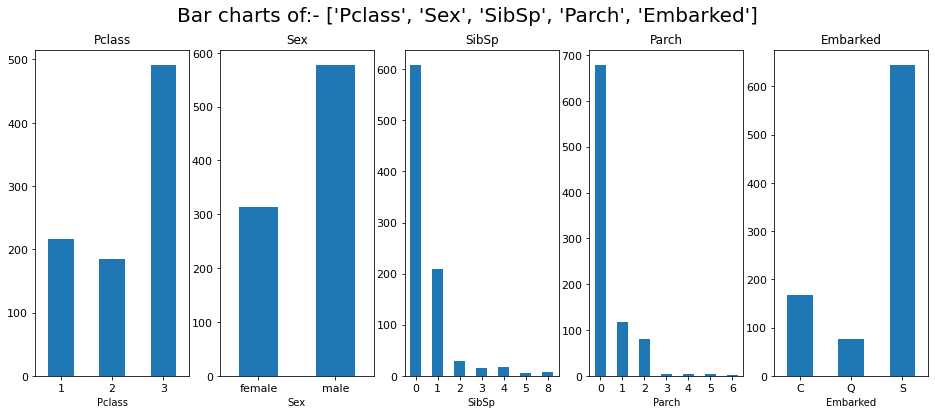

In [50]:
# Calling the function to plot all the Bar Plots at once.
Plot_Bar_Charts(BAR_inpData= TitanicSurvivalData, BAR_categorical_columns= CATEGORICAL_COLUMN_NAMES)   

### &emsp;&emsp; 2. Histogram for Continuous Predictor variables:

In [51]:
# Creating a function which can plot all the Histogram at once.
def plot_hist_charts(HIST_inpdata,HIST_column_name):    
    %matplotlib inline
    total_rows= 1
    try:
        HIST_inpdata.hist(column= CONTINUOUS_COLUMN_NAMES, figsize=(15,6), layout=(total_rows,int(np.ceil(len(CONTINUOUS_COLUMN_NAMES)/total_rows))))
        plt.suptitle('Histogram of :-'+ str(CONTINUOUS_COLUMN_NAMES), fontsize = 20)
        plt.show()
    except:
        print('Some thing is #### WRONG ####')

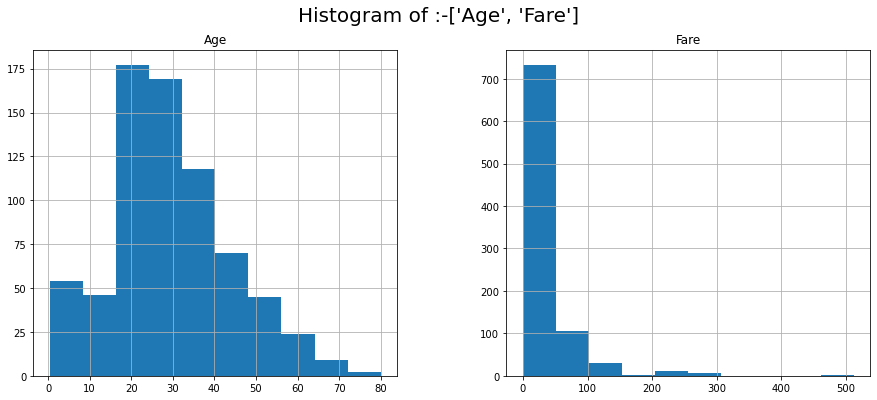

In [52]:
# Calling the function to plot all the Histogram at once.
plot_hist_charts(HIST_inpdata= TitanicSurvivalData, HIST_column_name= CONTINUOUS_COLUMN_NAMES)

## Histogram Interpretation
* <b>Age</b> :  The distribution is good.
* <b>Fare</b>:  Outliers seen beyond 300, need to treat them.

# Outlier treatment:-

### &emsp; Replacing outliers for 'Fare'

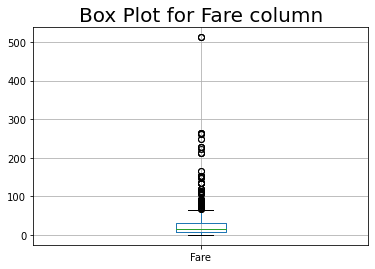

In [53]:
# Inputs.
inpdata     = TitanicSurvivalData
column_name = 'Fare'

### # Box Plot: Checking outliers.
#plt.boxplot(TitanicSurvivalData['Fare'] , vert=False)
inpdata.boxplot(column= column_name)  #, vert=False)
plt.title('Box Plot for {} column'.format(column_name), fontsize = 20)
plt.show()

### &emsp; Finding the nearest logical value of 300, for outliers treatment.

In [54]:
# Finding nearest values to 300 mark
TitanicSurvivalData['Fare'][TitanicSurvivalData['Fare']<300].sort_values(ascending=False)

341    263.000
438    263.000
27     263.000
88     263.000
311    262.375
        ...   
277      0.000
633      0.000
302      0.000
597      0.000
271      0.000
Name: Fare, Length: 888, dtype: float64

### &emsp; Above result shows the nearest logical value is 263.00, hence, replacing any value above 263.00 with it.

In [55]:
# Replacing outliers with nearest logical value.
TitanicSurvivalData['Fare'][TitanicSurvivalData['Fare']>263] = 263.0

### &emsp; Visualizing distribution after outlier treatment

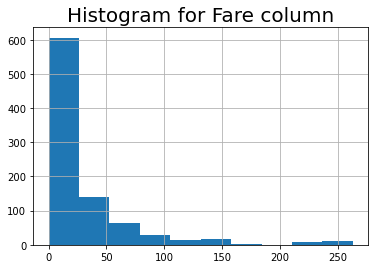

In [56]:
# Inputes.
inpdata     = TitanicSurvivalData
column_name = 'Fare'

# Histogram: After outlier treatment.
inpdata[column_name].hist()
plt.title('Histogram for {} column'.format(column_name), fontsize = 20)
plt.show()

# Missing values treatment:-

In [57]:
# Finding how many missing values are there for each column
TitanicSurvivalData.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

### &emsp; I am using Median and Mode value for the missing value replacement.

In [58]:
# Treating missing values of continuous variable with Median value
TitanicSurvivalData['Age'].fillna(TitanicSurvivalData['Age'].median(), inplace=True)

In [59]:
# Treating missing values of categorical variable with MODE value
TitanicSurvivalData['Embarked'].fillna(TitanicSurvivalData['Embarked'].mode()[0], inplace=True)

In [60]:
# Checking missing values again after the treatment
TitanicSurvivalData.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

# Feature Selection:-
Select the best columns(Features) which are correlated to the Target variable.
This can be done directly by measuring the correlation values & Chi-Square Tests. However, it is always helpful to visualize the relation between the Target variable and each of the predictors to get a better idea of data.

## &emsp; Relationship exploration: Categorical Vs Continuous -- Box Plots:-

In [61]:
# Creating a function which can plot all the Box Plots at once.
def plot_box_charts(data,target_variable,continuous_columns):
    total_rows= 1
    try:
        fig, PlotCanvas=plt.subplots(nrows=total_rows, ncols=int(np.ceil(len(continuous_columns)/total_rows)), figsize=(16,5))
        fig.suptitle('Box Plot of:- ' )#+ str(target_variable) +' vs ' + str(continuous_columns), fontsize = 20) 

        for i, PredictorCol in enumerate(list(continuous_columns)):
            data.boxplot(column=PredictorCol, by=target_variable, vert=True, ax=PlotCanvas.flatten()[i],fontsize= 15) 
    except:
        print('')

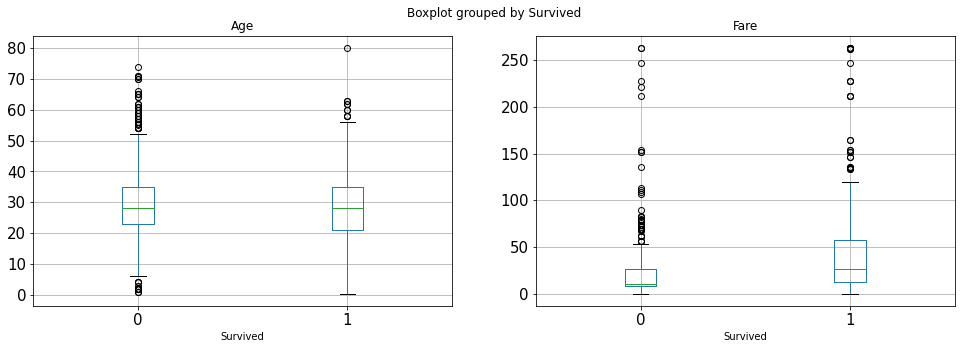

In [62]:
# Calling the function to plot all the Box Plots at once. 
plot_box_charts(data= TitanicSurvivalData, target_variable= TARGET_COLUMN_NAME, continuous_columns= CONTINUOUS_COLUMN_NAMES) 

## &emsp; Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test:-</font>

In [63]:
# Defining a function to find the statistical relationship with all the categorical variables

def FunctionAnova(inpData, TargetVariable, continuous_Predictor_List):
    from scipy.stats import f_oneway
    
    # Creating an empty list of final selected predictors
    Selected_Continuous_Predictors=[]

    print(BOLD, '##### ANOVA Results ##### \n',RESET)
    for predictor in continuous_Predictor_List:
        CategoryGroupLists=inpData.groupby(TargetVariable)[predictor].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        if (AnovaResults[1] < 0.05):
            print(BOLD,'**  ', predictor, RESET , GREEN,'is correlated with',RESET, TargetVariable, '||  P-Value:', GREEN,BOLD, AnovaResults[1], RESET)
            Selected_Continuous_Predictors.append(predictor)
        else:
            print(predictor,  RED,'is NOT correlated with',RESET, TargetVariable, '|| P-Value:',RED,BOLD, AnovaResults[1],RESET)
    print('\n\n',BOLD,'    Final Selected Continuous Columns:-\n\n',RESET,'    ',BOLD,'****',RESET,Selected_Continuous_Predictors)
    return(Selected_Continuous_Predictors)

In [64]:
# Calling the function to check which categorical variables are correlated with target variable
SELECTED_CONTINUOUS_COLUMNS= FunctionAnova(inpData= TitanicSurvivalData, TargetVariable= TARGET_COLUMN_NAME, 
                                                        continuous_Predictor_List= CONTINUOUS_COLUMN_NAMES)

 ##### ANOVA Results ##### 
 
Age  is NOT correlated with  Survived || P-Value:   0.052760688475835 
 **   Fare   is correlated with  Survived ||  P-Value:   1.8421954983111479e-16 


      Final Selected Continuous Columns:-

        ****  ['Fare']


## &emsp; Relationship exploration: Categorical Vs Categorical -- Grouped Bar Charts:-

In [65]:
# Creating a function which can plot all the Bar Charts at once.
def Plot_Bar_Charts(BAR_inpData, TargetVariable, BAR_categorical_columns):    
    %matplotlib inline    
    total_rows = 2
    category_color =  ['red','green']
    legend_text = ['Not-Survived','Survived']    
    try: 
        fig, subPlot=plt.subplots(nrows=total_rows, ncols=int(np.ceil(len(BAR_categorical_columns)/total_rows)), figsize=(16,10) )    

        for i, CategoricalCol in enumerate(list(BAR_categorical_columns)):
            CrossTabResult=pd.crosstab(index=BAR_inpData[CategoricalCol], columns=BAR_inpData[TargetVariable])
            CrossTabResult.plot.bar(color=category_color, ax=subPlot.flatten()[i], title=(CategoricalCol+' Vs '+TargetVariable),rot = 0)
            subPlot.flatten()[i].legend(legend_text, fontsize= 12)
    except:
        print('Some thing is #### WRONG ####')        

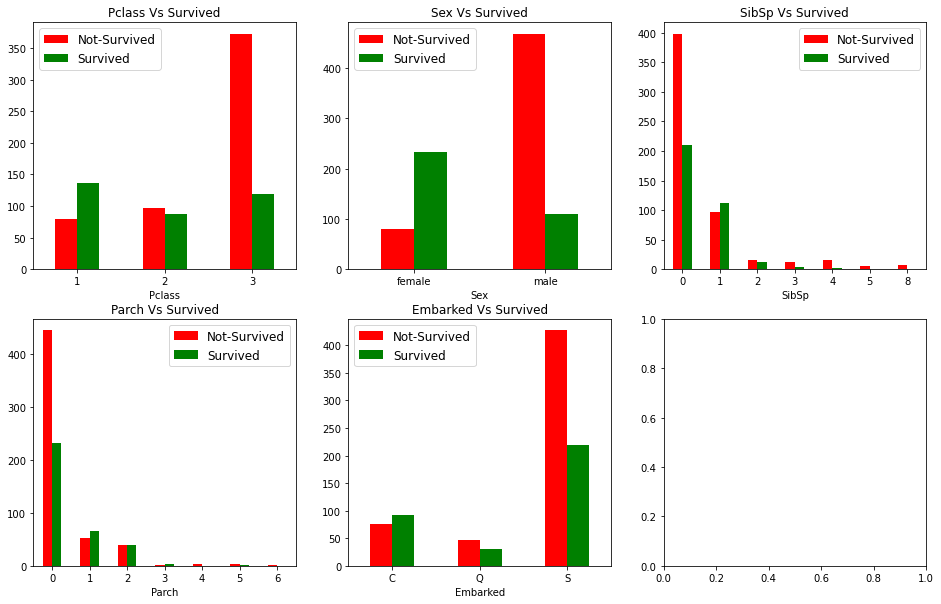

In [66]:
# Calling the function to plot all the Bar Plots at once.
Plot_Bar_Charts(BAR_inpData= TitanicSurvivalData, TargetVariable= TARGET_COLUMN_NAME, BAR_categorical_columns= CATEGORICAL_COLUMN_NAMES)  

## &emsp; Statistical Feature Selection (Categorical Vs Categorical) using Chi-Square Test:-

In [67]:
# Writing a function to find the correlation of all categorical variables with the Target variable
def FunctionChisq(inpData, TargetVariable, Categorical_Predictor_List):
    from scipy.stats import chi2_contingency
    
    # Creating an empty list of final selected predictors
    Selected_CATEGORICAL_Predictors=[]

    print(BOLD, '##### CHI-SQUARE Results ##### \n',RESET)
    for predictor in Categorical_Predictor_List:
        CrossTabResult=pd.crosstab(index=inpData[TargetVariable], columns=inpData[predictor])
        ChiSqResult = chi2_contingency(CrossTabResult)
        
        # If the ChiSq P-Value is <0.05, that means we reject H0
        if (ChiSqResult[1] < 0.05):
            print(BOLD,'**  ', predictor, RESET , 'is correlated with', TargetVariable, '| P-Value:', GREEN,BOLD, ChiSqResult[1], RESET)
            Selected_CATEGORICAL_Predictors.append(predictor)
        else:
            print(BOLD, predictor, RESET , 'is NOT correlated with', TargetVariable, '| P-Value:', RED,BOLD, ChiSqResult[1], RESET)        
    print('\n\n',BOLD,'    Final Selected Categorical Columns:-\n\n',RESET,'    ',BOLD,'****',RESET,Selected_CATEGORICAL_Predictors)
    return(Selected_CATEGORICAL_Predictors)

In [68]:
# Calling the function
SELECTED_CATEGORICAL_COLUMNS= FunctionChisq(inpData= TitanicSurvivalData, TargetVariable= TARGET_COLUMN_NAME, Categorical_Predictor_List= CATEGORICAL_COLUMN_NAMES)

 ##### CHI-SQUARE Results ##### 
 
 **   Pclass  is correlated with Survived | P-Value:   4.549251711298793e-23 
 **   Sex  is correlated with Survived | P-Value:   1.1973570627755645e-58 
 **   SibSp  is correlated with Survived | P-Value:   1.5585810465902116e-06 
 **   Parch  is correlated with Survived | P-Value:   9.703526421039997e-05 
 **   Embarked  is correlated with Survived | P-Value:   2.3008626481449577e-06 


      Final Selected Categorical Columns:-

        ****  ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']


In [69]:
print('Selected',BOLD,'Categorical',RESET,'Columns are:-',BOLD, SELECTED_CATEGORICAL_COLUMNS ,  RESET)
print('Selected',BOLD ,'Continuous',RESET,'Columns are:-', BOLD,  SELECTED_CONTINUOUS_COLUMNS ,  RESET)

Selected  Categorical  Columns are:-  ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked'] 
Selected  Continuous  Columns are:-  ['Fare'] 


# Selecting final predictors for Machine Learning:-

In [70]:
# Combining Selected columns.
SelectedColumns= SELECTED_CONTINUOUS_COLUMNS + SELECTED_CATEGORICAL_COLUMNS
print(BOLD,'\nSelected final predictors for Machine Learning:-',RESET,SelectedColumns)

# Selecting final columns
DataForML=TitanicSurvivalData[SelectedColumns]
DataForML.head()

 
Selected final predictors for Machine Learning:-  ['Fare', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']


,Fare,Pclass,Sex,SibSp,Parch,Embarked
0,7.2500,3,male,1,0,S
1,71.2833,1,female,1,0,C
2,7.9250,3,female,0,0,S
3,53.1000,1,female,1,0,S
4,8.0500,3,male,0,0,S


# Saving the final data for reference during deployment:-

In [71]:
DataForML.to_pickle('DataForML.pkl')

# Converting the binary nominal variable to numeric using 1/0 mapping:-

In [72]:
# Converting the binary nominal variable sex to numeric
DataForML['Sex'].replace({'female':0, 'male':1}, inplace=True)

# Converting the nominal variable to numeric using get_dummies():-

In [73]:
# Treating all the nominal variables at once using dummy variables
DataForML_Numeric=pd.get_dummies(DataForML)

# Adding Target Variable to the data
DataForML_Numeric['Survived']=TitanicSurvivalData['Survived']

# Printing sample rows
DataForML_Numeric.head()

,Fare,Pclass,Sex,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S,Survived
0,7.2500,3,1,1,0,0,0,1,0
1,71.2833,1,0,1,0,1,0,0,1
2,7.9250,3,0,0,0,0,0,1,1
3,53.1000,1,0,1,0,0,0,1,1
4,8.0500,3,1,0,0,0,0,1,0


# Machine Learning: Splitting the data into Training and Testing sample:-

In [74]:
# Printing all the column names for our reference
DataForML_Numeric.columns

Index(['Fare', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Survived'],
      dtype='object')

In [75]:
# Separate Target Variable and Predictor Variables
TargetVariable= TARGET_COLUMN_NAME
Predictors = DataForML_Numeric.columns[DataForML_Numeric.columns!=TARGET_COLUMN_NAME]

print('TargetVariable :-', TARGET_COLUMN_NAME)
print('Predictors     :-', Predictors)

TargetVariable=TARGET_COLUMN_NAME
Predictors= DataForML_Numeric.columns[DataForML_Numeric.columns!=TARGET_COLUMN_NAME]

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

TargetVariable :- Survived
Predictors     :- Index(['Fare', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked_C', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')


# Standardization / Normalization of data:-

In [76]:
### Sandardization of data
from sklearn.preprocessing import StandardScaler, MinMaxScaler

PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [77]:
# Checking the shape
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(623, 8)
(623,)
(268, 8)
(268,)


# Logistic Regression:-

LogisticRegression(C=5, solver='newton-cg')
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       157
           1       0.73      0.73      0.73       111

    accuracy                           0.78       268
   macro avg       0.77      0.77      0.77       268
weighted avg       0.78      0.78      0.78       268

[[127  30]
 [ 30  81]]

 Accuracy of the model on Testing Sample Data:  0.78 

Accuracy values for 10-fold Cross Validation:
 [0.77649393 0.77641044 0.77021909 0.82182649 0.78803431 0.75981111
 0.78268624 0.75756502 0.79649424 0.78302904]

Final Average Accuracy of the model:  0.78 


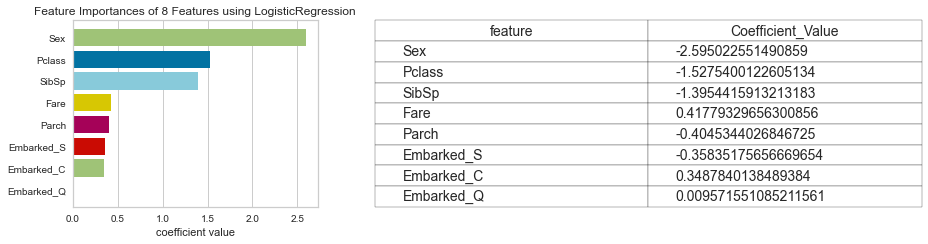

,Survived,LR_Predicted_Survived
0,1,0
1,0,0
2,0,0
3,1,1
4,1,1


In [87]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(C= 5,penalty= 'l2', solver= 'newton-cg')

# Printing all the parameters of logistic regression
print(clf)

# Creating the model on Training Data
LOG= clf.fit(X_train,y_train)
prediction= LOG.predict(X_test)

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data= X_test, columns= DataForML_Numeric.columns[DataForML_Numeric.columns!=TargetVariable])
TestingDataResults[TargetVariable]= y_test
TestingDataResults[('LR_Predicted_'+TargetVariable)]= np.round(prediction)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(prediction, y_test))

# Printing the Overall Accuracy of the model
F1_Score= metrics.f1_score(y_test, prediction, average='weighted')
print('\n Accuracy of the model on Testing Sample Data:', BOLD,round(F1_Score,2),RESET)

##############################################################################
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
Accuracy_Values=cross_val_score(clf, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', BOLD,round(Accuracy_Values.mean(),2),RESET)

##############################################################################################
## Feature Importances & Coed Data Frame
from yellowbrick.model_selection import FeatureImportances
fig = plt.figure(figsize=(13,3.5))
  
ax1 = plt.subplot2grid(shape=(1,6), loc=(0, 0), colspan=2)
viz = FeatureImportances(clf, labels= Predictors, relative= False, absolute= True)
viz.fit(X, y)

# Create Coef Data Frame
feature_importance= pd.DataFrame(data= Predictors, columns=['feature'] )
feature_importance['Coefficient_Value']= (viz.coef_.reshape(int(len(Predictors)/1) , 1 ))
feature_importance['Coefficient_Value_']= abs(viz.coef_.reshape(int(len(Predictors)/1) , 1 ))
feature_importance.sort_values('Coefficient_Value_',ascending= True, inplace= True)

ax2 = plt.subplot2grid(shape=(1,6), loc=(0,2),colspan=4 ,rowspan=1)
mpl_table= ax2.table(cellText= feature_importance[['feature','Coefficient_Value']].values[::-1], colLabels= feature_importance.columns,
                                     bbox= [0, 0, 1, 1], cellLoc= 'left', colWidths= [0.5,0.5])
mpl_table.set_fontsize(14)
ax2.axis('off')
viz.show()
plt.show()

##############################################################################################
LR_Accuracy = F1_Score
LR_CV_Accuracy = Accuracy_Values.mean()
#print(LR_Accuracy,LR_CV_Accuracy)

TestingDataResults[[TargetVariable,'LR_Predicted_'+TargetVariable]].head()

# Decision Trees:-

In [93]:
#Finding out Best Parameters of Decision Tree using GridSearchCV.
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

#Decision Tree Parameters
DT_cla_params = {'max_depth': list(range(1,20,1)), "criterion": ['gini', 'entropy']}

grid_DT_cla = GridSearchCV(DecisionTreeClassifier(), DT_cla_params, cv = 10)
grid_DT_cla.fit(X,y)

# Finding out best parameters.
DT_cla_1 = grid_DT_cla.best_params_

DT_cla_1

{'criterion': 'gini', 'max_depth': 3}

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       157
           1       0.83      0.68      0.75       111

    accuracy                           0.81       268
   macro avg       0.81      0.79      0.80       268
weighted avg       0.81      0.81      0.81       268

[[141  16]
 [ 35  76]]
Accuracy of the model on Testing Sample Data: 0.81

Accuracy values for 10-fold Cross Validation:
 [0.80938963 0.81776069 0.76791722 0.83190886 0.8309621  0.78065407
 0.7911255  0.76791722 0.83754206 0.79359477]

Final Average Accuracy of the model: 0.8


,Survived,DT_Predicted_Survived
0,1,0
1,0,0
2,0,0
3,1,1
4,1,1


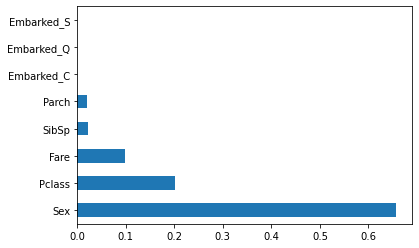

In [94]:
# Decision Trees
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=3,criterion='gini')

# Printing all the parameters of Decision Trees
# print(clf)

# Creating the model on Training Data
DTree=clf.fit(X_train,y_train)
prediction=DTree.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

TestingDataResults[('DT_Predicted_'+TargetVariable)]=np.round(prediction)

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DTree.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
Accuracy_Values=cross_val_score(clf, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

DT_Accuracy = round(F1_Score,4)
DT_CV_Accuracy = round(Accuracy_Values.mean(),4)
#print(DT_Accuracy,DT_CV_Accuracy)

TestingDataResults[[TargetVariable,'DT_Predicted_'+TargetVariable]].head()

# &emsp; Plotting a Decision Tree:-

In [97]:
# Installing the required library for plotting the decision tree
#!pip install dtreeplt

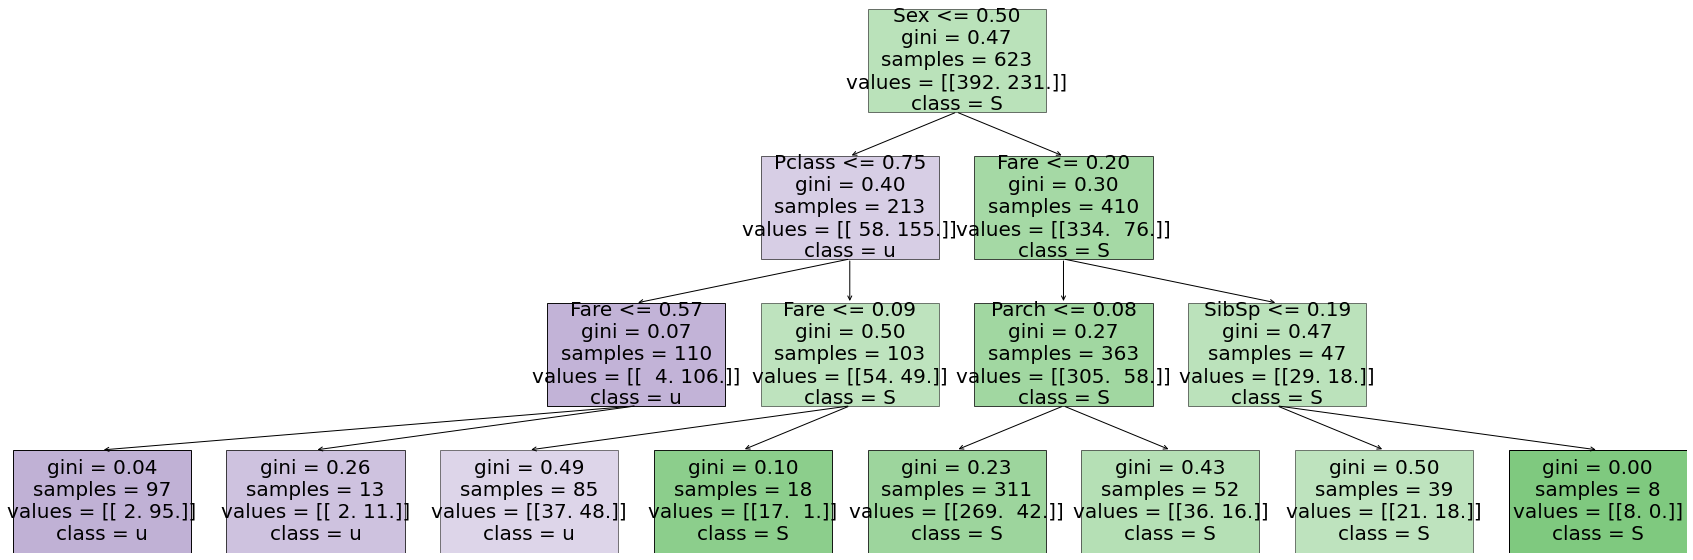

In [100]:
from dtreeplt import dtreeplt
import matplotlib.pyplot as plt
dtree = dtreeplt(model=clf, feature_names=Predictors, target_names=TargetVariable)
fig = dtree.view()
currentFigure=plt.gcf()
currentFigure.set_size_inches(30,10)

# Random Forest:-

In [119]:
# Finding out Best Parameters of Random Forest using GridSearchCV.
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


# #Random Forest Parameters
# RF_cla_params = {'max_depth': list(range(1,20,1)), "criterion": ['gini', 'entropy'],
#                  'n_estimators': [100,110,150,185,200,225,250,230,270,300,330,350,400,410,450,500,470,170]}

RF_cla_params = {'max_depth': [7,9], "criterion": ['gini'],
                 'n_estimators': [100,110,150,185,200,225,250,230,270,300,330,350,400,410,450,500,470,170]}

grid_RF_cla = GridSearchCV(RandomForestClassifier(), RF_cla_params)#, cv = 10)
grid_RF_cla.fit(X , y)

# Finding out best parameters.
RF_cla_1 = grid_RF_cla.best_params_
print(RF_cla_1)

{'criterion': 'gini', 'max_depth': 7, 'n_estimators': 185}


RandomForestClassifier(max_depth=7, n_estimators=185)
              precision    recall  f1-score   support

           0       0.78      0.90      0.84       157
           1       0.82      0.65      0.72       111

    accuracy                           0.79       268
   macro avg       0.80      0.77      0.78       268
weighted avg       0.80      0.79      0.79       268

[[141  16]
 [ 39  72]]
Accuracy of the model on Testing Sample Data: 0.79

Accuracy values for 10-fold Cross Validation:
 [0.79579741 0.77562138 0.71832623 0.8309621  0.90955299 0.80164322
 0.80980449 0.75756502 0.84992121 0.81482546]

Final Average Accuracy of the model: 0.81


,Survived,RF_Predicted_Survived
0,1,1
1,0,0
2,0,0
3,1,1
4,1,0


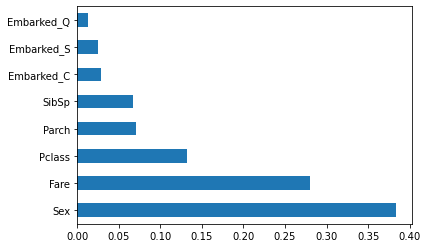

In [130]:
# Random Forest.
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=7, n_estimators=185,criterion='gini')

# Printing all the parameters of Random Forest
print(clf)

# Creating the model on Training Data
RF=clf.fit(X_train,y_train)
prediction=RF.predict(X_test)

TestingDataResults[('RF_Predicted_'+TargetVariable)]=np.round(prediction)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))


# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
Accuracy_Values=cross_val_score(clf, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

RF_Accuracy = round(F1_Score,4)
RF_CV_Accuracy = round(Accuracy_Values.mean(),4)
#print(RF_Accuracy,RF_CV_Accuracy)

TestingDataResults[[TargetVariable,'RF_Predicted_'+TargetVariable]].head()

# &emsp; Plotting one of the Decision Trees in Random Forest:-

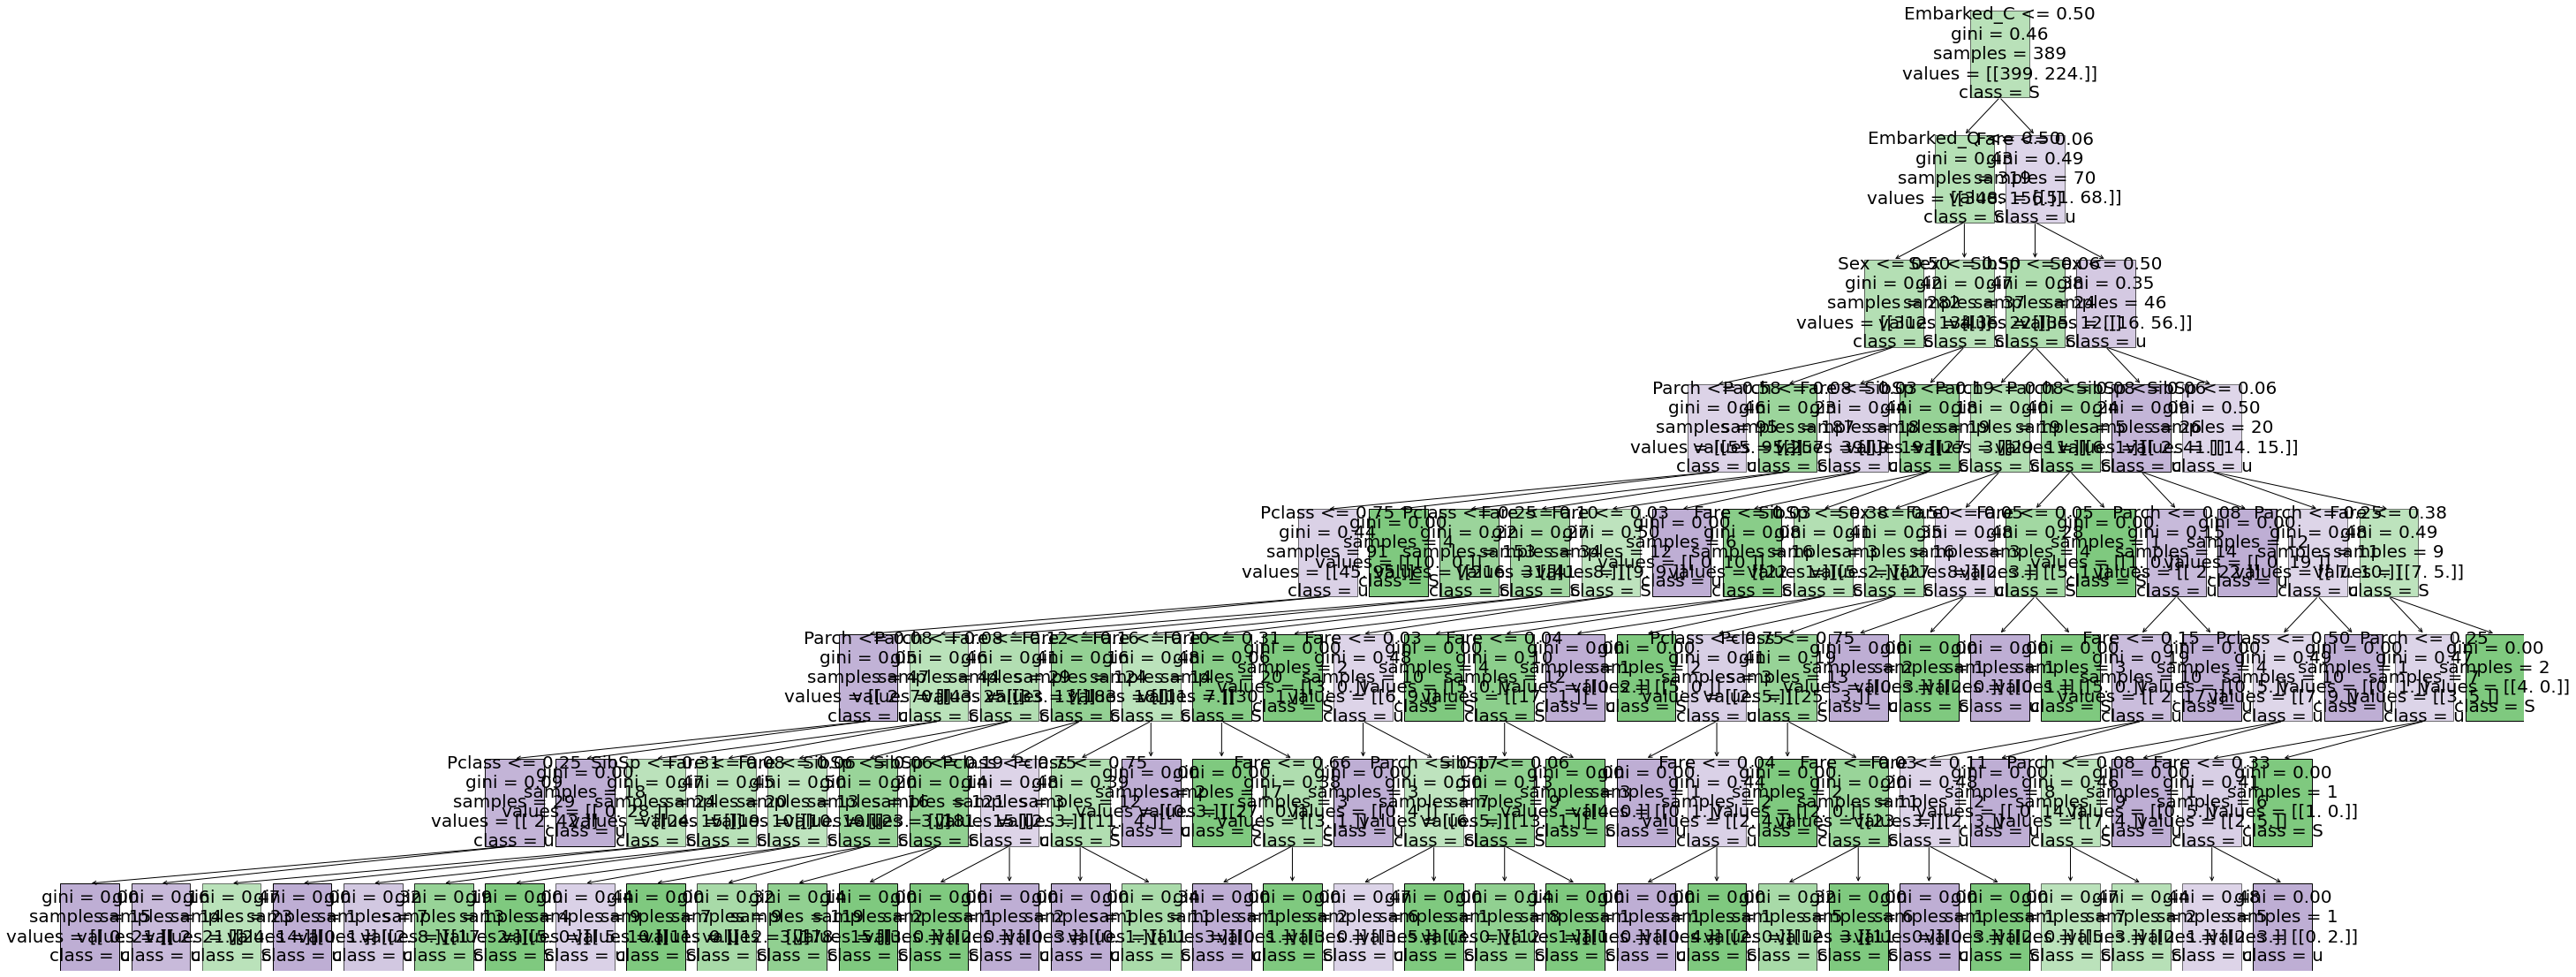

In [131]:
# PLotting a single Decision Tree from Random Forest
from dtreeplt import dtreeplt
dtree = dtreeplt(model=clf.estimators_[5], feature_names=Predictors, target_names=TargetVariable)
fig = dtree.view()
currentFigure=plt.gcf()
currentFigure.set_size_inches(50,20)

# AdaBoost:-

In [52]:
#Finding out Best Parameters of AdaBoost using GridSearchCV.
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

#Random Forest Parameters
DTC2=DecisionTreeClassifier(max_depth=2)
DTC3=DecisionTreeClassifier(max_depth=3)
DTC4=DecisionTreeClassifier(max_depth=4)
DTC5=DecisionTreeClassifier(max_depth=5)

AB_cla_params= {'learning_rate': [0.01,0.02,0.03,0.04,0.05,0.1,0.2,0.3,0.4,0.5],'base_estimator':[DTC2, DTC3, DTC4, DTC5] 
                 ,'n_estimators': [100,110,150,185,200,225,250,230,270,300,330,350,400,410,450,500,470,170]}

grid_AB_cla = GridSearchCV(AdaBoostClassifier(), AB_cla_params)#, cv = 10)
grid_AB_cla.fit(X , y)

# Finding out best parameters.
AB_cla_1 = grid_AB_cla.best_params_
print(AB_cla_1)

{'base_estimator': DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best'), 'learning_rate': 0.01, 'n_estimators': 270}


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=4),
                   learning_rate=0.01, n_estimators=270)
              precision    recall  f1-score   support

           0       0.78      0.89      0.83       157
           1       0.80      0.65      0.72       111

    accuracy                           0.79       268
   macro avg       0.79      0.77      0.77       268
weighted avg       0.79      0.79      0.78       268

[[139  18]
 [ 39  72]]
Accuracy of the model on Testing Sample Data: 0.78

Accuracy values for 10-fold Cross Validation:
 [0.75414332 0.78268624 0.74470894 0.87673316 0.90955299 0.8284365
 0.8356903  0.75497104 0.87519294 0.80419041]

Final Average Accuracy of the model: 0.82


,Survived,AB_Predicted_Survived
0,1,1
1,0,0
2,0,0
3,1,1
4,1,0


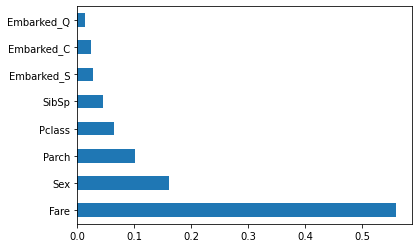

In [146]:
# Adaboost 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Choosing Decision Tree with 4 level as the weak learner
DTC=DecisionTreeClassifier(max_depth=4)
clf = AdaBoostClassifier(n_estimators=270, base_estimator=DTC ,learning_rate=0.01)

# Printing all the parameters of Adaboost
print(clf)

# Creating the model on Training Data
AB=clf.fit(X_train,y_train)
prediction=AB.predict(X_test)

TestingDataResults[('AB_Predicted_'+TargetVariable)]=np.round(prediction)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
Accuracy_Values=cross_val_score(clf, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

AB_Accuracy = round(F1_Score,4)
AB_CV_Accuracy = round(Accuracy_Values.mean(),4)
#print(AB_Accuracy,AB_CV_Accuracy)

TestingDataResults[[TargetVariable,'AB_Predicted_'+TargetVariable]].head()

# &emsp; Plotting one of the Decision trees from Adaboost:-

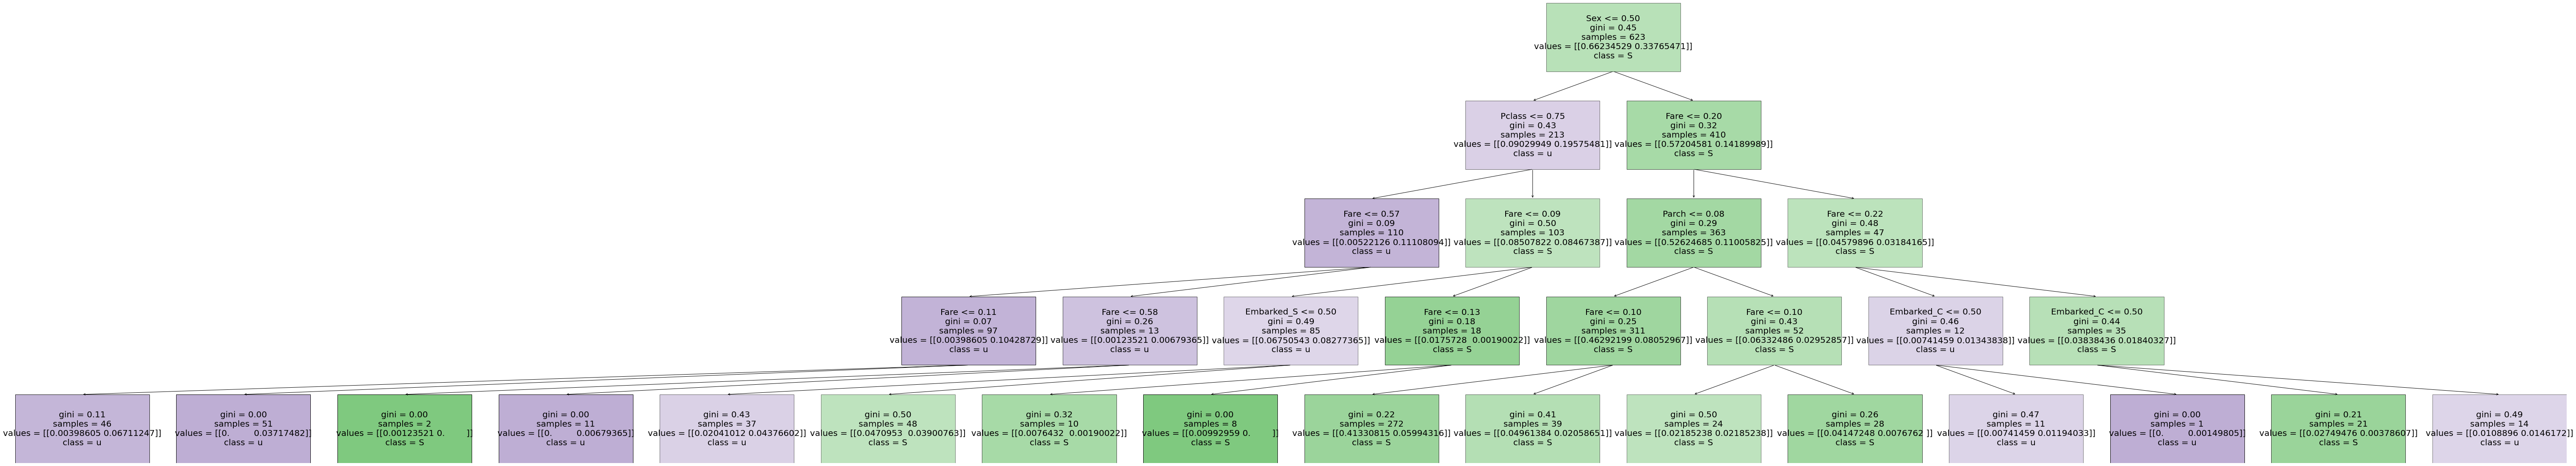

In [147]:
# PLotting 6th single Decision Tree from Adaboost
from dtreeplt import dtreeplt
dtree = dtreeplt(model=clf.estimators_[6], feature_names=Predictors, target_names=TargetVariable)
fig = dtree.view()

#  XGBoost:-

In [55]:
#Finding out Best Parameters of XGBoost using GridSearchCV.
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

#XGBoost Parameters
XGB_cla_params = {'max_depth': list(range(1,10,1)), 'learning_rate': [0.01,0.02,0.03,0.04,0.05,0.1,0.2,0.3,0.4,0.5], 
                  'n_estimators':[100,150,200,225,250,275,300,320,340,360,380,400,420,440,460,480,500],
                  'objective': ['binary:logistic'], "booster": ['gbtree'], 'eval_metric': ['Logloss', 'AUC', 'mlogloss'] }

grid_XGB_cla = GridSearchCV(XGBClassifier(), XGB_cla_params) # , cv = 2)
grid_XGB_cla.fit(X , y)

# Finding out best parameters.
XGB_cla_1 = grid_XGB_cla.best_params_
print(XGB_cla_1)

{'booster': 'gbtree', 'eval_metric': 'mlogloss', 'learning_rate': 0.4, 'max_depth': 2, 'n_estimators': 420, 'objective': 'binary:logistic'}


              precision    recall  f1-score   support

           0       0.80      0.87      0.83       157
           1       0.79      0.70      0.74       111

    accuracy                           0.80       268
   macro avg       0.80      0.78      0.79       268
weighted avg       0.80      0.80      0.80       268

[[136  21]
 [ 33  78]]
Accuracy of the model on Testing Sample Data: 0.8

Accuracy values for 10-fold Cross Validation:
 [0.79884454 0.76791722 0.77021909 0.82182649 0.85250075 0.81617528
 0.8284365  0.78442417 0.80711636 0.80586809]

Final Average Accuracy of the model: 0.81


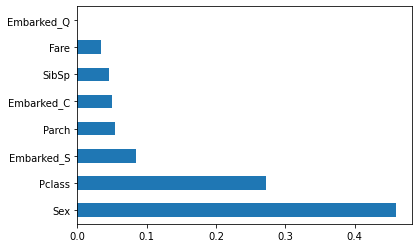

,Survived,XB_Predicted_Survived
0,1,0
1,0,0
2,0,0
3,1,1
4,1,1


In [160]:
# Xtreme Gradient Boosting (XGBoost)
from xgboost import XGBClassifier
clf=XGBClassifier(max_depth=2, learning_rate=0.4, n_estimators=107, objective='binary:logistic',
                  eval_metric = "mlogloss", booster='gbtree')

# Printing all the parameters of XGBoost
# print(clf)

# Creating the model on Training Data
XGB=clf.fit(X_train,y_train)
prediction=XGB.predict(X_test)

TestingDataResults[('XB_Predicted_'+TargetVariable)]=np.round(prediction)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(clf, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')
plt.show()

XB_Accuracy = round(F1_Score,4)
XB_CV_Accuracy = round(Accuracy_Values.mean(),4)
#print(XB_Accuracy,XB_CV_Accuracy)

TestingDataResults[[TargetVariable,'XB_Predicted_'+TargetVariable]].head()

# &emsp; Plotting a single Decision tree out of XGBoost:-

In [57]:
# !pip install graphviz
# !conda install graphviz
# !pip install pydotplus

In [163]:
# Setting up the os path for the Graphviz
import os 
os.environ["PATH"] += os.pathsep + 'C:\\Users\\Pranab_Kumar_Paul\\anaconda3\\Library\\bin\\graphviz'

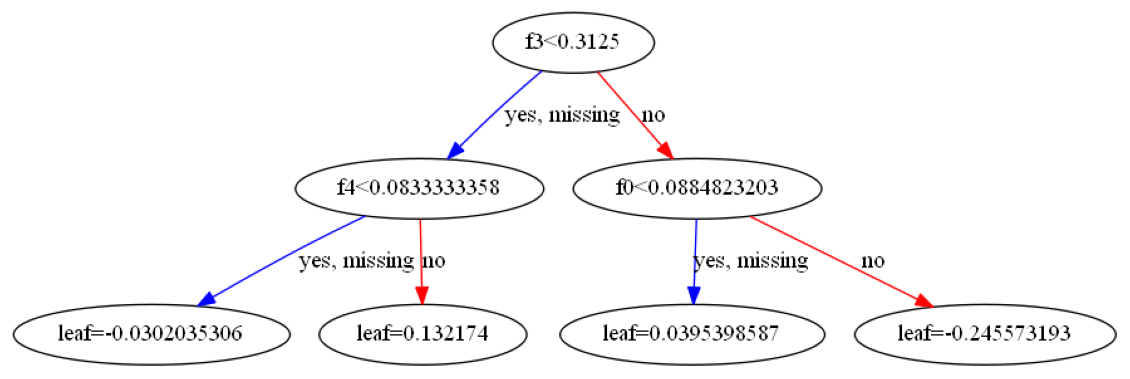

In [164]:
from xgboost import plot_tree
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 8))
plot_tree(XGB, num_trees=10, ax=ax)
plt.show()

# KNN:-

In [60]:
#Finding out Best N_Neighbors value of KNN using GridSearchCV.
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

KNN_params = {'n_neighbors': list(range(1,10,1))}

grid_KNN_cla = GridSearchCV(KNeighborsClassifier(), KNN_params, cv = 10)
grid_KNN_cla.fit( X , y)

# Finding out best parameters.
KNN_cla_1 = grid_KNN_cla.best_params_
KNN_cla_1

{'n_neighbors': 9}

In [165]:
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=9)

# Printing all the parameters of KNN
print(clf)

# Creating the model on Training Data
KNN=clf.fit(X_train,y_train)
prediction=KNN.predict(X_test)

TestingDataResults[('KNN_Predicted_'+TargetVariable)]=np.round(prediction)
# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
Accuracy_Values=cross_val_score(clf, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

KNN_Accuracy = round(F1_Score,4)
KNN_CV_Accuracy = round(Accuracy_Values.mean(),4)
#print(KNN_Accuracy,KNN_CV_Accuracy)

TestingDataResults[[TargetVariable,'KNN_Predicted_'+TargetVariable]].head()

KNeighborsClassifier(n_neighbors=9)
              precision    recall  f1-score   support

           0       0.78      0.89      0.83       157
           1       0.80      0.65      0.72       111

    accuracy                           0.79       268
   macro avg       0.79      0.77      0.77       268
weighted avg       0.79      0.79      0.78       268

[[139  18]
 [ 39  72]]
Accuracy of the model on Testing Sample Data: 0.78

Accuracy values for 10-fold Cross Validation:
 [0.80431954 0.78268624 0.74470894 0.80011797 0.87519294 0.78588533
 0.83754206 0.71406084 0.8284365  0.82722684]

Final Average Accuracy of the model: 0.8


,Survived,KNN_Predicted_Survived
0,1,0
1,0,0
2,0,0
3,1,1
4,1,1


# SVM:-

In [62]:
#Finding out Best Parameters of SVM using GridSearchCV.
from sklearn.model_selection import GridSearchCV
from sklearn import svm

SVM_params = {'C':list(range(4,20,1)), 'gamma':[0.01,0.02,0.03,0.04,0.05,0.1,0.2,0.3,], 'kernel':['rbf' , 'poly', 'sigmoid']}

grid_SVM_cla = GridSearchCV(svm.SVC(), SVM_params)#, cv = 10)
grid_SVM_cla.fit( X , y)

# Finding out best parameters.
SVM_reg_1 = grid_SVM_cla.best_params_
SVM_reg_1

{'C': 6, 'gamma': 0.3, 'kernel': 'rbf'}

In [174]:
# Support Vector Machines(SVM)
from sklearn import svm
clf = svm.SVC(C=6, kernel='rbf', gamma=0.1)

# Printing all the parameters of SVM
print(clf)

# Creating the model on Training Data
SVM=clf.fit(X_train,y_train)
prediction=SVM.predict(X_test)

TestingDataResults[('SVM_Predicted_'+TargetVariable)]=np.round(prediction)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
Accuracy_Values=cross_val_score(clf, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


SVM_Accuracy = round(F1_Score,2)
SVM_CV_Accuracy = round(Accuracy_Values.mean(),2)
#print(SVM_Accuracy,SVM_CV_Accuracy)

TestingDataResults[[TargetVariable,'SVM_Predicted_'+TargetVariable]].head()

SVC(C=6, gamma=0.1)
              precision    recall  f1-score   support

           0       0.80      0.89      0.85       157
           1       0.82      0.69      0.75       111

    accuracy                           0.81       268
   macro avg       0.81      0.79      0.80       268
weighted avg       0.81      0.81      0.81       268

[[140  17]
 [ 34  77]]
Accuracy of the model on Testing Sample Data: 0.81

Accuracy values for 10-fold Cross Validation:
 [0.80795243 0.81776069 0.76791722 0.84348731 0.7987694  0.78065407
 0.7911255  0.76527186 0.82683216 0.78302904]

Final Average Accuracy of the model: 0.8


,Survived,SVM_Predicted_Survived
0,1,0
1,0,0
2,0,0
3,1,1
4,1,1


# Naive Bayes:-

In [176]:
# Naive Bays
from sklearn.naive_bayes import GaussianNB, MultinomialNB

clf = GaussianNB()

# Printing all the parameters of Naive Bayes
print(clf)

NB=clf.fit(X_train,y_train)
prediction=NB.predict(X_test)

TestingDataResults[('NBayes_Predicted_'+TargetVariable)]=np.round(prediction)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
Accuracy_Values=cross_val_score(clf, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


NBayes_Accuracy = round(F1_Score,2)
NBayes_CV_Accuracy = round(Accuracy_Values.mean(),2)
#print(NBayes_Accuracy,NBayes_CV_Accuracy)

TestingDataResults[[TargetVariable,'NBayes_Predicted_'+TargetVariable]].head()

GaussianNB()
              precision    recall  f1-score   support

           0       0.84      0.74      0.79       157
           1       0.68      0.80      0.74       111

    accuracy                           0.76       268
   macro avg       0.76      0.77      0.76       268
weighted avg       0.78      0.76      0.77       268

[[116  41]
 [ 22  89]]
Accuracy of the model on Testing Sample Data: 0.77

Accuracy values for 10-fold Cross Validation:
 [0.75555556 0.73349062 0.76173197 0.76732168 0.78874499 0.7752809
 0.80842372 0.79775281 0.78442417 0.82022472]

Final Average Accuracy of the model: 0.78


,Survived,NBayes_Predicted_Survived
0,1,1
1,0,0
2,0,0
3,1,1
4,1,1


# Best Model For Deployment:-

In [177]:
TestingDataResults[[TargetVariable,'LR_Predicted_'+TargetVariable,'DT_Predicted_'+TargetVariable,'RF_Predicted_'+TargetVariable,'AB_Predicted_'+TargetVariable,'XB_Predicted_'+TargetVariable,'KNN_Predicted_'+TargetVariable,'SVM_Predicted_'+TargetVariable, 'NBayes_Predicted_'+TargetVariable]].head()

,Survived,LR_Predicted_Survived,DT_Predicted_Survived,RF_Predicted_Survived,AB_Predicted_Survived,XB_Predicted_Survived,KNN_Predicted_Survived,SVM_Predicted_Survived,NBayes_Predicted_Survived
0,1,0,0,1,1,0,0,0,1
1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0
3,1,1,1,1,1,1,1,1,1
4,1,1,1,0,0,1,1,1,1


In [178]:
best_model = pd.DataFrame()

best_model['Model_Name'] = ['Logistic_Regression', 'Decision_Trees', 'Random_Forest', 'AdaBoost', 'XGBoost', 'KNN','SVM','Naive_Bayes']
best_model['Model_Accuracy'] = [LR_Accuracy, DT_Accuracy, RF_Accuracy, AB_Accuracy, XB_Accuracy, KNN_Accuracy, SVM_Accuracy, NBayes_Accuracy]
best_model['CV_Accuracy'] = [LR_CV_Accuracy, DT_CV_Accuracy, RF_CV_Accuracy, AB_CV_Accuracy, XB_CV_Accuracy, KNN_CV_Accuracy, SVM_CV_Accuracy, NBayes_CV_Accuracy]
print(best_model)

print('\n\nPer', BOLD, 'Model Accuracy',RESET, 'Best Model is:-', BOLD ,CYAN , best_model.loc[best_model['Model_Accuracy'].idxmax(), 'Model_Name'],'(',best_model.loc[best_model['Model_Accuracy'].idxmax(), 'Model_Accuracy'],').',RESET)
print('Per', BOLD, 'Cross Validation Accuracy',RESET, ' Best Model is:-', BOLD ,RED , best_model.loc[best_model['CV_Accuracy'].idxmax(), 'Model_Name'],'(',best_model.loc[best_model['CV_Accuracy'].idxmax(), 'CV_Accuracy'],').',RESET)

            Model_Name  Model_Accuracy  CV_Accuracy
0  Logistic_Regression        0.776119     0.781257
1       Decision_Trees        0.806200     0.802900
2        Random_Forest        0.789900     0.806400
3             AdaBoost        0.782900     0.816600
4              XGBoost        0.796500     0.805300
5                  KNN        0.782900     0.800000
6                  SVM        0.810000     0.800000
7          Naive_Bayes        0.770000     0.780000


Per  Model Accuracy  Best Model is:-   SVM ( 0.81 ). 
Per  Cross Validation Accuracy   Best Model is:-   AdaBoost ( 0.8166 ). 


# Deployment of the Model:-
### &emsp;  &emsp;  Based on the above trials, - AdaBoost - algorithm produces the best average accuracy. Hence, I am choosing - AdaBoost - as the final model.

### Choosing only the most important variables:-

<b>'Fare', 'Sex', 'Parch', 'Pclass'</b> These are consistently on top of the variable importance chart for every algorithm. Hence choosing these as final set of predictor variables.

In [179]:
# Separate Target Variable and Predictor Variables
TargetVariable='Survived'

# Selecting the final set of predictors for the deployment Based on the variable importance charts of multiple algorithms
Predictors=['Fare', 'Sex', 'Parch', 'Pclass']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

### Sandardization of data
from sklearn.preprocessing import StandardScaler, MinMaxScaler
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

print(X.shape)
print(y.shape)

(891, 4)
(891,)


## &emsp; 1. Retraining the model with 100% data & selected Predictors:-

In [180]:
# Adaboost 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Choosing Decision Tree with 4 level as the weak learner
DTC=DecisionTreeClassifier(max_depth=4)
clf = AdaBoostClassifier(n_estimators=200, base_estimator=DTC ,learning_rate=0.01)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
Accuracy_Values=cross_val_score(clf, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [0.80795243 0.81617528 0.75497104 0.86584626 0.89788513 0.83915337
 0.82497932 0.76225561 0.84171774 0.79359477]

Final Average Accuracy of the model: 0.82


### &emsp; &emsp; Find out the best Parameters for the selected model using GridSearchCV:-

In [135]:
#Finding out Best Parameters of AdaBoost using GridSearchCV.
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

#Random Forest Parameters
DTC2=DecisionTreeClassifier(max_depth=2)
DTC3=DecisionTreeClassifier(max_depth=3)
DTC4=DecisionTreeClassifier(max_depth=4)
DTC5=DecisionTreeClassifier(max_depth=5)

AB_cla_params= {'learning_rate': [0.01,0.02,0.03,0.04,0.05,0.1,0.2,0.3,0.4,0.5],'base_estimator':[DTC2, DTC3, DTC4, DTC5] 
                 ,'n_estimators': [100,110,120,130,140,150,160,170,180,185,190,195,200,225,250,230,270,300]}

grid_AB_cla = GridSearchCV(AdaBoostClassifier(), AB_cla_params)#, cv = 10)
grid_AB_cla.fit(X , y)

# Finding out best parameters.
AB_cla_1 = grid_AB_cla.best_params_
print(AB_cla_1)

{'base_estimator': DecisionTreeClassifier(max_depth=5), 'learning_rate': 0.4, 'n_estimators': 195}


### &emsp; &emsp; So, Best Parameters For the model is max_depth=5, 'n_estimators': 195, 'learning_rate': 0.04. Retraining the model once again using 100% data on this parameters

## &emsp; &emsp; Retraining the model with Best Parameters.

In [181]:
#Adaboost 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Choosing Decision Tree with 1 level as the weak learner
DTC=DecisionTreeClassifier(max_depth=4)
clf = AdaBoostClassifier(n_estimators=197, base_estimator=DTC ,learning_rate=0.01)
FinalAdaBoostModel= clf.fit(X, y)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
Accuracy_Values=cross_val_score(FinalAdaBoostModel, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [0.79744817 0.80556137 0.74179904 0.86584626 0.89788513 0.82683216
 0.82497932 0.76225561 0.84171774 0.79359477]

Final Average Accuracy of the model: 0.82


# &emsp; Step 2. Save the model as a serialized file which can be stored anywhere:-

In [182]:
import pickle
import os

# Saving the Python objects as serialized files.

with open('FinalAdaBoostModel.pkl', 'wb') as fileWriteStream:
    pickle.dump(FinalAdaBoostModel, fileWriteStream)
    fileWriteStream.close()
    
print('pickle file of Predictive Model is saved at Location:',os.getcwd())

pickle file of Predictive Model is saved at Location: C:\Users\Pranab_Kumar_Paul\Desktop\Python_Script\My_Script


# &emsp; Step 3. Create a python function:-

In [183]:
# This Function can be called from any from any front end tool/website

def FunctionPredictResult(InputData):
    import pandas as pd
    Num_Inputs=InputData.shape[0]

    
    # Appending the new data with the Training data
    DataForML=pd.read_pickle('DataForML.pkl')
    InputData=InputData.append(DataForML)
    
    # Converting the binary nominal variable sex to numeric
    InputData['Sex'].replace({'female':0, 'male':1}, inplace=True)
    
    # Generating dummy variables for rest of the nominal variables
    InputData=pd.get_dummies(InputData)
            
    # Maintaining the same order of columns as it was during the model training
    Predictors=['Fare', 'Sex', 'Parch', 'Pclass']
    
    # Generating the input values to the model
    X=InputData[Predictors].values[0:Num_Inputs]
    
    # Generating the standardized values of X since it was done while model training also
    X=PredictorScalerFit.transform(X)
    
    # Loading the Function from pickle file
    import pickle
    with open('FinalAdaBoostModel.pkl', 'rb') as fileReadStream:
        PredictionModel=pickle.load(fileReadStream)
        fileReadStream.close()
            
    # Genrating Predictions
    Prediction=PredictionModel.predict(X)
    PredictionResult=pd.DataFrame(Prediction, columns=['Predicted Status'])
    return(PredictionResult)

In [184]:
# Calling the function for some new case to test
NewSampleData=pd.DataFrame(
                        data=[[71,'female',0, 1],
                              [50,'male',0, 3]],
                     columns=['Fare', 'Sex', 'Parch', 'Pclass'])

print(NewSampleData)

# Calling the Function for prediction
FunctionPredictResult(InputData= NewSampleData)

   Fare     Sex  Parch  Pclass
0    71  female      0       1
1    50    male      0       3


,Predicted Status
0,1
1,0


# &emsp; Step 4. Deploying a predictive model as an API:-

### Creating the model with few parameters
### - Function for predictions API

In [185]:
# Creating the function which can take inputs and return predictions
def FunctionGeneratePrediction(inp_Fare ,inp_Sex, inp_Parch, inp_Pclass):
    
    # Creating a data frame for the model input
    SampleInputData=pd.DataFrame(
     data=[[inp_Fare , inp_Sex, inp_Parch, inp_Pclass]],
     columns=['Fare', 'Sex', 'Parch', 'Pclass'])

    # Calling the function defined above using the input parameters
    Predictions=FunctionPredictResult(InputData= SampleInputData)

    # Returning the predictions
    return(Predictions.to_json())

# Calling the Function
FunctionGeneratePrediction(  inp_Fare=71,
                             inp_Sex ='female',
                             inp_Parch=0,
                             inp_Pclass=1
                             )

'{"Predicted Status":{"0":1}}'

# Creating Flask API:-

In [186]:
#!pip install flask

from flask import Flask, request, jsonify
import pickle
import pandas as pd
import numpy

In [187]:
app = Flask(__name__)

@app.route('/prediction_api', methods=["GET"])
def prediction_api():
    try:
        # Getting the paramters from API call
        Fare_value = float(request.args.get('Fare'))
        Sex_value=request.args.get('Sex')
        Parch_value=float(request.args.get('Parch'))
        Pclass_value = float(request.args.get('Pclass'))
                
        # Calling the funtion to get predictions
        prediction_from_api=FunctionGeneratePrediction(
                                                inp_Fare=Fare_value,
                                                inp_Sex=Sex_value, 
                                                inp_Parch=Parch_value, 
                                                inp_Pclass=Pclass_value
                                                )

        return (prediction_from_api)
    
    except Exception as e:
        return('Something is not right!:'+str(e))

# Starting the API engine:-

In [188]:
import os
if __name__ =="__main__":
    
    # Hosting the API in localhost
    app.run(host='127.0.0.1', port=8080, threaded=True, debug=True, use_reloader=False)
    # Interrupt kernel to stop the API

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


 * Running on http://127.0.0.1:8080/ (Press CTRL+C to quit)
127.0.0.1 - - [13/Jun/2021 20:14:47] "GET /prediction_api?Fare=71&Sex=female&Parch=0&Pclass=1 HTTP/1.1" 200 -
127.0.0.1 - - [13/Jun/2021 20:14:48] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [13/Jun/2021 20:15:01] "GET /prediction_api?Fare=71&Sex=male&Parch=0&Pclass=1 HTTP/1.1" 200 -
127.0.0.1 - - [13/Jun/2021 20:15:15] "GET /prediction_api?Fare=71&Sex=female&Parch=0&Pclass=1 HTTP/1.1" 200 -
127.0.0.1 - - [13/Jun/2021 20:15:22] "GET /prediction_api?Fare=71&Sex=male&Parch=0&Pclass=1 HTTP/1.1" 200 -


# Sample URL to call the API:-

#### Copy and paste below URL in the web browser
http://127.0.0.1:8080/prediction_api?Fare=71&Sex=female&Parch=0&Pclass=1

&emsp;&emsp;&emsp; &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; &emsp;&emsp; &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; &emsp;&emsp; &emsp;&emsp;&emsp;&emsp;&emsp; &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;Pranab Kumar Paul.